## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

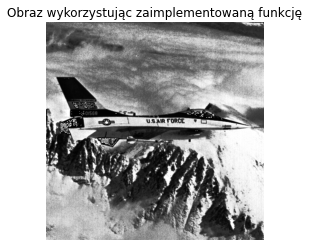

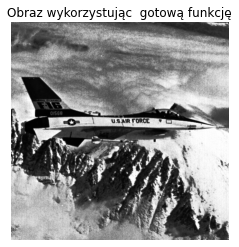

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate


# etap1
jet = cv2.imread('jet.bmp',cv2.IMREAD_GRAYSCALE)
histogram = cv2.calcHist([jet],[0],None,[256],[0,256])

#etap 2 i 3

average_lightness=np.round(np.mean(jet))

for i in range(np.size(histogram)):
    if histogram[i] > average_lightness:
        threshold = i
        lm = histogram[i]
        break
#etap4
C1_ = histogram[0:threshold]
C2_ = histogram[threshold:]
C1__ = C1_.cumsum()
C2__ = C2_.cumsum()

C1 = C1__/np.max(C1__)
C2 = C2__/np.max(C2__)


#etap5
_C1 = C1*lm
_C2 = lm +1 + (255- lm -1)*C2
_C1=cv2.normalize(_C1,None,0,int(lm),cv2.NORM_MINMAX)
_C2=cv2.normalize(_C2,None,int(lm),255,cv2.NORM_MINMAX)
C=np.append(C1,C2)

#etap 6
jet_lut = cv2.LUT(jet,C)
plt.imshow(jet_lut)
plt.gray()
plt.axis('off')
plt.title("Obraz wykorzystując zaimplementowaną funkcję")
plt.show()


jet_equ=cv2.equalizeHist(jet)
plt.imshow(jet_equ, vmin=0, vmax=256)
plt.axis('off')
plt.title("Obraz wykorzystując  gotową funkcję")
plt.gray()
plt.show()
jet_BBHE_hist=cv2.calcHist([jet_equ],[0],None,[256],[0,256])

